In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

__A company introduces a new shampoo product. Two factors believed to have the most influence on sales - unit selling price and advertising expenditure. <br> To investigate the effects of these two variables on sales, prices of 2.00 euro, 2.50 euro, and 3.00 euro were paired with advertising expenditures of 50.000 euro and 100.000 euro in 24 test markets.__

In [14]:
tbl1 = pd.read_excel('Tyler.xlsx')
tbl1.head()

,Price,Advertising_Expenditure($1000),Sales
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358


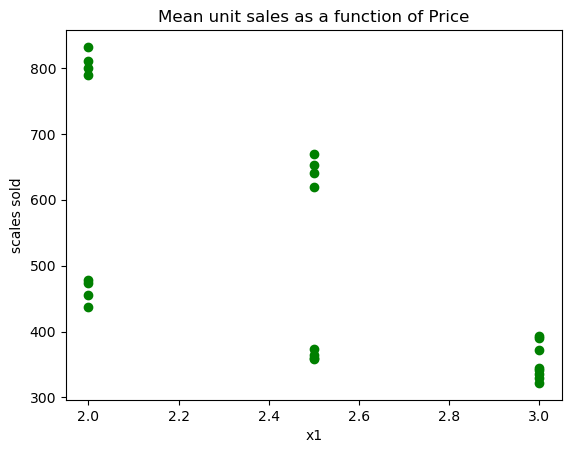

In [22]:
plt.scatter(tbl1['Price'], tbl1['Sales'], color = 'green')
plt.ylabel('scales sold')
plt.xlabel('x1')
plt.title('Mean unit sales as a function of Price')
plt.show()

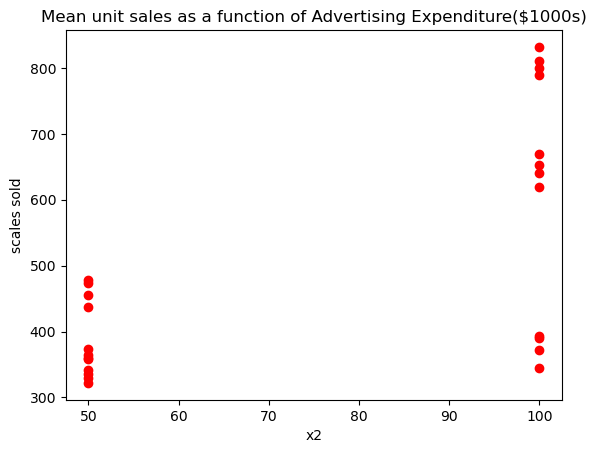

In [21]:
plt.scatter(tbl1['Advertising_Expenditure($1000)'], tbl1['Sales'], color = 'red')
plt.ylabel('scales sold')
plt.xlabel('x2')
plt.title('Mean unit sales as a function of Advertising Expenditure($1000s)')
plt.show()

__When interaction between two variables is present, we cannot study the effect of one variable on the response y independently of the other variable. <br> In other words, meaningful conclusions can be developed only if we consider the joint effect that both variables have on the response. <br>
y = b0 + b1x1 + b2x2 + b3x1x2 + e <br>
y = unit sales (1000s) <br>
x1 = price ($) <br>
x2 = advertising expenditure__

__Estimated Regression Equation <br>__
y = z0 + b1z1 + b2z2 + b3z3 <br>
z3 = z1 * z2 <br>
__z3 is the Interaction variable__

In [24]:
z1 = tbl1['Advertising_Expenditure($1000)']
z2 = tbl1['Price']
z3 = z1 * z2

In [27]:
x_new = np.column_stack((z1,z2,z3))
y = tbl1['Sales']
xnew2 = sm.add_constant(x_new)
model2 = sm.OLS(y, xnew2)
Model2 = model2.fit()
print(Model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           9.26e-17
Time:                        15:44:28   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.0

__Sales = -276 + 175 * Price + 19.7 * AdvExp - 6.08 * PriceAdv__

__The regression results show that the effect of advertising expenditure on sales depends on the price.__